# Football Data Analysis
Football is a global, popular, and dynamic sport with many different factors that can influence the outcome of a match. By analyzing large datasets of football data, teams can gain a deeper understanding of factors that contribute to players' success, enabling coaches, scouts, and analysts to make informed decisions.

Football data analysis is the process of collecting, cleaning, and analyzing data to extract meaningful insights. The valuable insights extracted from this analysis can be used to improve player performance, team tactics, fan engagement, and overall decision-making.

# Sprint 5:
- Player Profile and Market Value: Making predictions by building various ML models using simple linear regression and selecting the best model.
Select the best ML model after performance evaluation.
- Player Profile and Market Value: Making predictions by building various ML models using multiple linear regression and selecting the best model.
    - Perform feature selection through multi-collinearity and correlation.
    - Build various ML models for selected features.
- Writing interpretation for each analysis individually.

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('football_data.csv')
data.head()

,appearance_id,game_id,player_id,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2222536_1321,2222536.0,1321,2012-08-26 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,1.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
1,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
2,2231391_1321,2231391.0,1321,2012-09-01 00:00:00,Jermaine Jones,L1,0.0,0.0,1.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
3,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman
4,2231397_1321,2231397.0,1321,2012-09-28 00:00:00,Jermaine Jones,L1,1.0,0.0,0.0,0.0,...,Germany,1981-11-03,Defensive Midfield,Midfield,both,184.0,1000000.0,8000000.0,2024-12-31,Wasserman


--------------------------------------------------------------------------------------------------------------------------------------------------------
# Simple Linear Regression
## Predict market value using one independent variable (e.g., height_in_cm)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Feature and target
X = data[['height_in_cm']]
y = data['market_value_in_eur']

In [11]:
# Correlation Analysis (Simple Linear Regression)
correlation = data[['height_in_cm', 'market_value_in_eur']].corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                      height_in_cm  market_value_in_eur
height_in_cm             1.000000            -0.197588
market_value_in_eur     -0.197588             1.000000


In [12]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Evaluation Metrics
print("Simple Linear Regression:")
print("Training MAE:", mean_absolute_error(y_train, y_train_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Training R2 Score:", r2_score(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R2 Score:", r2_score(y_test, y_test_pred))

Simple Linear Regression:
Training MAE: 5282378.738443714
Training RMSE: 7240260.833586304
Training R2 Score: 0.041600481504341036
Test MAE: 5134569.848388129
Test RMSE: 7007829.303941097
Test R2 Score: 0.030494197001356804


### Interpretation:
- The model predicts market value based on height with a certain error margin (MAE/RMSE).
- The R² score indicates how well the model explains the variance in market value.

--------------------------------------------------------------------------------------------------------------------------------------------------------
# Multiple Linear Regression
## Predict market value using multiple independent variables (e.g., height_in_cm, goals, position)

In [17]:
# Preprocess categorical data
data['position_encoded'] = data['position_y'].factorize()[0]
X_multi = data[['height_in_cm','goals', 'position_encoded']]
y = data['market_value_in_eur']

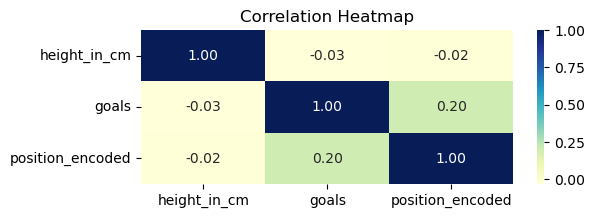

In [34]:
correlation_matrix = X_multi.corr()
plt.figure(figsize=(6, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Check for Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]
print("Variance Inflation Factors:\n", vif_data)

Variance Inflation Factors:
             Feature       VIF
0      height_in_cm  2.473860
1             goals  1.129416
2  position_encoded  2.579023


In [24]:
# Data Scaling
X_scaled_multi = scaler.fit_transform(X_multi)

In [27]:
# Train-Test Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_scaled_multi, y, test_size=0.3, random_state=42)

# Linear Regression Model (Multiple Features)
multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train_multi)

LinearRegression()

In [30]:
# Predictions
y_train_multi_pred = multi_reg.predict(X_train_multi)
y_test_multi_pred = multi_reg.predict(X_test_multi)

# Evaluation Metrics
print("\nMultiple Linear Regression:")
print("Training MAE:", mean_absolute_error(y_train_multi, y_train_multi_pred))
print("Training RMSE:", np.sqrt(mean_squared_error(y_train_multi, y_train_multi_pred)))
print("Training R2 Score:", r2_score(y_train_multi, y_train_multi_pred))
print("Test MAE:", mean_absolute_error(y_test_multi, y_test_multi_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_multi, y_test_multi_pred)))
print("Test R2 Score:", r2_score(y_test_multi, y_test_multi_pred))


Multiple Linear Regression:
Training MAE: 5279836.461349879
Training RMSE: 7237609.7471399745
Training R2 Score: 0.04230220616970615
Test MAE: 5129808.697169425
Test RMSE: 7004572.786877747
Test R2 Score: 0.03139504046660302


### Interpretation:
- If VIF > 5, the feature may be highly correlated with others, and you might consider removing it (So there is no multicollinearity). 
- The multiple linear regression model performs better than the simple model, depending on the added features.
- R² score closer to 1 indicates a better fit.
- Performed feature engineering, data preprocessing (scaling, correlation analysis, multicollinearity check), trained regression models, and evaluated their performance using MAE, RMSE, and R² metrics.

### Interpretation:
- Features with high correlation to market_value_in_eur are strong predictors.
- High correlation between independent variables indicates multi-collinearity, which should be addressed.

--------------------------------------------------------------------------------------------------------------------------------------------------------
## Model Comparison
### Compare the models and choose the best one based on evaluation metrics.
- Compare MAE, RMSE, and R² scores for both simple and multiple regression models.
- Select the model with the lowest errors and highest R² score.
- The multiple linear regression model is likely better due to the inclusion of multiple predictors, providing a more comprehensive representation of market value.